In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [ ]:
# Read the data
data = pd.read_csv()
data

In [ ]:
# Set the time index
data['time'] = pd.to_datetime(data[''])
data = data.set_index(data['time'])
data

In [16]:
# Calculate AQI
a = [[0, 35, 75, 115, 150, 250, 350, 500],
     [0, 50, 150, 250, 350, 420, 500, 600],
     [0, 50, 150, 475, 800, 1600, 2100, 2620],
     [0, 40, 80, 180, 280, 565, 750, 940],
     [0, 2, 4, 14, 24, 36, 48, 60],
     [0, 100, 160, 215, 265, 800, 1000, 1200]]
b = [0, 50, 100, 150, 200, 300, 400, 500]
c = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

def IAQI(i, c):
    for j in range(7): 
        if (c >= a[i][j]) and (c < a[i][j + 1]):
            iaqi = (c - a[i][j])*(b[j + 1] - b[j])/(a[i][j + 1] - a[i][j]) + b[j]
            break
    return iaqi

# When i = 0, return the aqi, and when i = 1, return the dominant contaminate
def AQI(i, x):
    aqi = max(x)
    pollution = c[x.index(aqi)]
    if i == 0:
        return aqi
    else:
        return pollution

# Air quality level
def AQ(aqi):
    if aqi <= 50:
        return "Excellent"
    elif aqi <= 100:
        return "Good"
    elif aqi <= 150:
        return "Mild"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Severe"
    else:
        return "Hazard"

In [ ]:
#需要运算每个城市，每种污染物的iaqi并计算出AQI，AQ

In [ ]:
# Plot the time seris
#以下三个cell需要改title，label，plot里面的内容
fig = plt.figure(figsize=(8, 5), dpi=120)

plt.rcParams['font.sans-serif']=['Times New Roman']

plt.plot(data[''], color='r')
plt.title('')
plt.xlabel('Time')
plt.ylabel('')

plt.xticks(fontsize=12, rotation=0, ha='center', va='top')
plt.yticks(fontsize=12, rotation=0, ha='right', va='center')
plt.tick_params(axis='both', bottom=True, top=False, left=True, right=False, 
                direction='in', which='major')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [ ]:
# Plot the annual average
fig = plt.figure(figsize=(8, 5), dpi=120)

plt.rcParams['font.sans-serif']=['Times New Roman']

plt.plot(data.resample('Y').mean()[''], color='r')
plt.title('Year')
plt.xlabel('Time')
plt.ylabel('')

plt.xticks(fontsize=12, rotation=0, ha='center', va='top')
plt.yticks(fontsize=12, rotation=0, ha='right', va='center')
plt.tick_params(axis='both', bottom=True, top=False, left=True, right=False, 
                direction='in', which='major')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [ ]:
# Plot the monthly average
fig = plt.figure(figsize=(8, 5), dpi=120)

plt.rcParams['font.sans-serif']=['Times New Roman']

plt.plot(data.resample('M').mean()[''], color='r')
plt.title('Month')
plt.xlabel('Time')
plt.ylabel('')

plt.xticks(fontsize=12, rotation=0, ha='center', va='top')
plt.yticks(fontsize=12, rotation=0, ha='right', va='center')
plt.tick_params(axis='both', bottom=True, top=False, left=True, right=False, 
                direction='in', which='major')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [20]:
# Plot contribution（待修改）（未知是否用，运行失败）
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

TypeError: 'function' object is not subscriptable

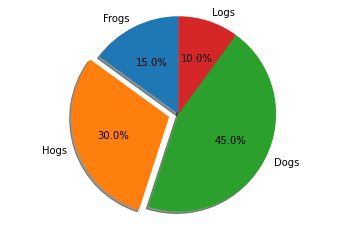

In [18]:
# Plot a pie（待修改）（各种污染物的iaqi/总iaqi画比例图，选定城市、时间）
#（以及每个城市空气质量等级占比：优秀良好等）
#（每个城市月主要污染物占比）
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#名称
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#每块百分比
sizes = [15, 30, 45, 10]
#哪块拎出来
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#不用改
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

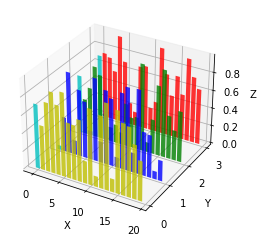

In [21]:
# Plot 3-d（待修改）（x时间y城市z空气质量）
# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
#改为4城市名称
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()